## This files contains the Logistic Regression, Random Forest, and Support Vector Machine Models

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [2]:
# assign directory, I only use data from 2019 till 2023
# you can download the data from here Link: https://oracleselixir.com/tools/downloads

match_data = pd.DataFrame()
directory = link_to_your_match_data_folder
for filename in os.scandir(directory):
    if filename.is_file():
        match_data = pd.concat([match_data,pd.read_csv(filename)])

C:\Users\admin\AppData\Local\Temp\ipykernel_12356\2440161630.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.concat([match_data,pd.read_csv(filename)])
C:\Users\admin\AppData\Local\Temp\ipykernel_12356\2440161630.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.concat([match_data,pd.read_csv(filename)])


In [3]:
df = match_data[['result','gameid','participantid','firstblood', 'firstdragon', 'firstherald', 'firsttower', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']]
df = df[(df["participantid"]==100)|(df["participantid"]==200)]

In [10]:
df

,result,gameid,participantid,firstblood,firstdragon,firstherald,firsttower,goldat15,xpat15,csat15,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,1,ESPORTSTMNT01/1030526,100,0.0,1.0,1.0,1.0,25461.0,29721.0,490.0,...,468.0,2579.0,1391.0,22.0,7.0,15.0,4.0,4.0,2.0,7.0
11,0,ESPORTSTMNT01/1030526,200,1.0,0.0,0.0,0.0,22882.0,28330.0,468.0,...,490.0,-2579.0,-1391.0,-22.0,4.0,2.0,7.0,7.0,15.0,4.0
22,0,ESPORTSTMNT01/1040501,100,1.0,0.0,1.0,0.0,25027.0,28752.0,484.0,...,531.0,1467.0,-1261.0,-47.0,5.0,6.0,1.0,1.0,2.0,5.0
23,1,ESPORTSTMNT01/1040501,200,0.0,1.0,0.0,1.0,23560.0,30013.0,531.0,...,484.0,-1467.0,1261.0,47.0,1.0,2.0,5.0,5.0,6.0,1.0
34,0,ESPORTSTMNT01/1040511,100,1.0,0.0,1.0,0.0,22913.0,31100.0,523.0,...,548.0,-1586.0,-928.0,-25.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130151,0,ESPORTSTMNT01_3438649,200,0.0,1.0,0.0,0.0,24031.0,30006.0,540.0,...,521.0,31.0,1299.0,19.0,4.0,13.0,2.0,1.0,3.0,4.0
130162,1,ESPORTSTMNT01_3436660,100,1.0,1.0,0.0,1.0,23720.0,28871.0,515.0,...,461.0,-75.0,545.0,54.0,3.0,4.0,5.0,5.0,9.0,3.0
130163,0,ESPORTSTMNT01_3436660,200,0.0,0.0,1.0,0.0,23795.0,28326.0,461.0,...,515.0,75.0,-545.0,-54.0,5.0,9.0,3.0,3.0,4.0,5.0
130174,1,ESPORTSTMNT01_3438678,100,1.0,0.0,0.0,0.0,23356.0,28430.0,481.0,...,515.0,-660.0,-1568.0,-34.0,4.0,7.0,2.0,2.0,0.0,4.0


## Import Training-Val Data

### Clean Data for Nan, Infinite and too large value

In [11]:
#Cleaning the data as there is some Null
def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis = 1)
    return df[indices_to_keep]

In [12]:
df.shape

(97726, 22)

In [13]:
df = clean_dataset(df)
df

,result,gameid,participantid,firstblood,firstdragon,firstherald,firsttower,goldat15,xpat15,csat15,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,1,ESPORTSTMNT01/1030526,100,0.0,1.0,1.0,1.0,25461.0,29721.0,490.0,...,468.0,2579.0,1391.0,22.0,7.0,15.0,4.0,4.0,2.0,7.0
11,0,ESPORTSTMNT01/1030526,200,1.0,0.0,0.0,0.0,22882.0,28330.0,468.0,...,490.0,-2579.0,-1391.0,-22.0,4.0,2.0,7.0,7.0,15.0,4.0
22,0,ESPORTSTMNT01/1040501,100,1.0,0.0,1.0,0.0,25027.0,28752.0,484.0,...,531.0,1467.0,-1261.0,-47.0,5.0,6.0,1.0,1.0,2.0,5.0
23,1,ESPORTSTMNT01/1040501,200,0.0,1.0,0.0,1.0,23560.0,30013.0,531.0,...,484.0,-1467.0,1261.0,47.0,1.0,2.0,5.0,5.0,6.0,1.0
34,0,ESPORTSTMNT01/1040511,100,1.0,0.0,1.0,0.0,22913.0,31100.0,523.0,...,548.0,-1586.0,-928.0,-25.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130151,0,ESPORTSTMNT01_3438649,200,0.0,1.0,0.0,0.0,24031.0,30006.0,540.0,...,521.0,31.0,1299.0,19.0,4.0,13.0,2.0,1.0,3.0,4.0
130162,1,ESPORTSTMNT01_3436660,100,1.0,1.0,0.0,1.0,23720.0,28871.0,515.0,...,461.0,-75.0,545.0,54.0,3.0,4.0,5.0,5.0,9.0,3.0
130163,0,ESPORTSTMNT01_3436660,200,0.0,0.0,1.0,0.0,23795.0,28326.0,461.0,...,515.0,75.0,-545.0,-54.0,5.0,9.0,3.0,3.0,4.0,5.0
130174,1,ESPORTSTMNT01_3438678,100,1.0,0.0,0.0,0.0,23356.0,28430.0,481.0,...,515.0,-660.0,-1568.0,-34.0,4.0,7.0,2.0,2.0,0.0,4.0


In [14]:
#Save them as csv file for storage
df.to_csv("training_data.csv")

In [3]:
#import them back in
df = pd.read_csv("training_data.csv")

In [9]:
df.columns

Index(['Unnamed: 0', 'result', 'gameid', 'participantid', 'firstblood',
       'firstdragon', 'firstherald', 'firsttower', 'goldat15', 'xpat15',
       'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15',
       'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'deathsat15',
       'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15'],
      dtype='object')

In [12]:
df.drop(columns=['Unnamed: 0'],inplace=True)

### Scale and separate data between predictor variables and dependent variable

In [13]:
def splittingData(df):
    df = df.copy()
    #spliting x -y
    x = df.drop(columns=["gameid","participantid"]).iloc[:, 1:]
    y = df.iloc[:, 0]
    #Scale the data
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    return x,y

In [14]:
X,y = splittingData(df)
print(y)
print(X)

0        1
1        0
2        0
3        1
4        0
        ..
97721    0
97722    1
97723    0
97724    1
97725    0
Name: result, Length: 97726, dtype: int64
[[-0.99938623  1.00010233  1.00147459 ... -0.0275529  -0.87143104
   0.96687774]
 [ 1.00061415 -0.99989768 -0.99852758 ...  0.97255886  1.50113603
  -0.03135194]
 [ 1.00061415 -0.99989768  1.00147459 ... -1.02766465 -0.87143104
   0.30139129]
 ...
 [-0.99938623 -0.99989768  1.00147459 ... -0.36092348 -0.50642072
   0.30139129]
 [ 1.00061415 -0.99989768 -0.99852758 ... -0.69429407 -1.23644136
  -0.03135194]
 [-0.99938623  1.00010233  1.00147459 ... -0.0275529   0.04109475
  -0.69683839]]


## Splitting training-valdata
Getting the 90% of data for training and 10% for validation

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,shuffle=True)

# Logistic Regression

In [18]:
#Training the data
def trainingModelLogisticRegression(x_train,y_train,reg,sol):
    lr = LogisticRegression(penalty=reg, solver=sol,max_iter=1000)
    lr.fit(x_train,y_train)
    return lr

#### l1 regularization

In [39]:
trainedLrL1 = trainingModelLogisticRegression(X_train,y_train,'l1','liblinear')

#### l2 regularization

In [40]:
trainedLrL2= trainingModelLogisticRegression(X_train,y_train,'l2','saga')

#### No regularization

In [32]:
trainedNone= trainingModelLogisticRegression(X_train,y_train,'none','sag')

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


### Tesing Model

In [36]:
def testingLr(lr,x_test,y_test):
    acc = ['Accuracy']
    pre = ['Precision']
    re = ['Recall']
    f1 = ['F1 Score']
    sumacc=0
    sumf1=0
    sumpre=0
    sumre= 0

    testEliteLr = lr.predict(x_test)
    accs= accuracy_score(y_test, testEliteLr)
    pres= precision_score(y_test, testEliteLr)
    res = recall_score(y_test, testEliteLr)
    f1s = f1_score(y_test, testEliteLr)
        
    sumacc =sumacc+accs
    sumpre =sumpre+pres
    sumre = sumre +res
    sumf1 =sumf1+f1s
    
    acc.append(' {:.5f}'.format(accs))
    pre.append(' {:.5f}'.format(pres))
    re.append(' {:.5f}'.format(res))
    f1.append(' {:.5f}'.format(f1s))
        
    table=[]
    table.append(acc)
    table.append(pre)
    table.append(re)
    table.append(f1)
    
    print(tabulate(table))


### Coefficients

In [24]:
def coefficientsLr(model):
    coefficients = np.hstack((model.intercept_,model.coef_[0]))
    name = ['firstblood', 'firstdragon', 'firstherald', 'firsttower', 'goldat15',
       'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15',
       'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15',
       'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']
    return name,coefficients

### Performance of models

#### Validation data

In [41]:
#No regularization
testingLr(trainedNone,X_test,y_test)

---------  -------
Accuracy   0.7621
Precision  0.76521
Recall     0.75405
F1 Score   0.75959
---------  -------


In [42]:
#L1 regularization
testingLr(trainedLrL1,X_test,y_test)

---------  -------
Accuracy   0.7619
Precision  0.765
Recall     0.75385
F1 Score   0.75938
---------  -------


In [43]:
#L1 regularization
testingLr(trainedLrL2,X_test,y_test)

---------  -------
Accuracy   0.7621
Precision  0.76521
Recall     0.75405
F1 Score   0.75959
---------  -------


In [44]:
#Coefficients
name,coef = coefficientsLr(trainedLrL1)
df = pd.DataFrame(data={'variable': ['Intercept'] + name, 'coefficient': coef})
df = df.sort_values(by='coefficient')
print(df.to_markdown())

|    | variable        |   coefficient |
|---:|:----------------|--------------:|
|  8 | opp_goldat15    |   -0.354349   |
| 10 | opp_csat15      |   -0.177302   |
|  9 | opp_xpat15      |   -0.148616   |
| 17 | opp_killsat15   |   -0.12177    |
| 14 | killsat15       |   -0.0962695  |
| 18 | opp_assistsat15 |   -0.0894204  |
| 13 | csdiffat15      |   -0.0214704  |
|  0 | Intercept       |   -0.00329462 |
|  1 | firstblood      |    0.018633   |
|  3 | firstherald     |    0.0200043  |
| 16 | deathsat15      |    0.0319334  |
| 15 | assistsat15     |    0.088143   |
|  4 | firsttower      |    0.143384   |
|  6 | xpat15          |    0.153905   |
|  7 | csat15          |    0.180709   |
| 19 | opp_deathsat15  |    0.189397   |
| 12 | xpdiffat15      |    0.207107   |
|  2 | firstdragon     |    0.261176   |
|  5 | goldat15        |    0.344263   |
| 11 | golddiffat15    |    0.430212   |


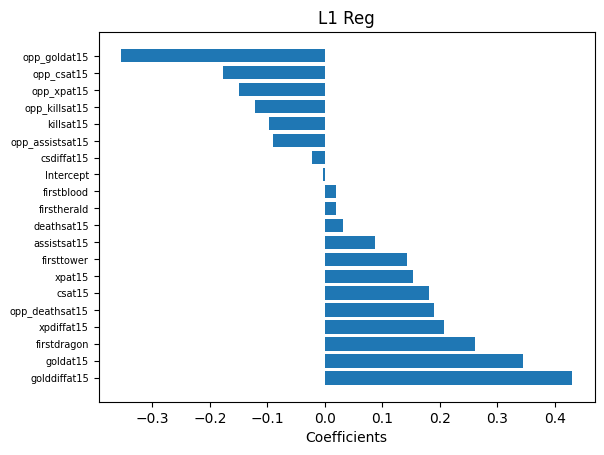

In [46]:
plt.rcdefaults()
fig, ax = plt.subplots()

name,coef = coefficientsLr(trainedLrL1)
df = pd.DataFrame(data={'variable': ['Intercept'] + name, 'coefficient': coef})
df = df.sort_values(by='coefficient')

yLable = df.iloc[:, 0].tolist()
coef = df.iloc[:, 1].tolist()
y_pos = np.arange(len(yLable))


ax.barh(y_pos, coef, align='center')

ax.set_yticks(y_pos, labels=yLable, size=7)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficients')
ax.set_title('L1 Reg')

plt.show()

In [48]:
#Coefficients
name,coef = coefficientsLr(trainedLrL2)
df = pd.DataFrame(data={'variable': ['Intercept'] + name, 'coefficient': coef})
df = df.sort_values(by='coefficient')
print(df.to_markdown())

|    | variable        |   coefficient |
|---:|:----------------|--------------:|
|  8 | opp_goldat15    |    -0.355404  |
| 17 | opp_killsat15   |    -0.274548  |
|  9 | opp_xpat15      |    -0.147169  |
| 18 | opp_assistsat15 |    -0.0893404 |
| 10 | opp_csat15      |    -0.0586239 |
| 19 | opp_deathsat15  |    -0.0390514 |
|  0 | Intercept       |    -0.0033683 |
|  1 | firstblood      |     0.0187104 |
|  3 | firstherald     |     0.0203843 |
|  7 | csat15          |     0.061722  |
| 15 | assistsat15     |     0.0876947 |
| 13 | csdiffat15      |     0.109305  |
| 14 | killsat15       |     0.132513  |
|  4 | firsttower      |     0.143692  |
|  6 | xpat15          |     0.152529  |
| 16 | deathsat15      |     0.184481  |
| 12 | xpdiffat15      |     0.210065  |
|  2 | firstdragon     |     0.261255  |
|  5 | goldat15        |     0.345396  |
| 11 | golddiffat15    |     0.426875  |


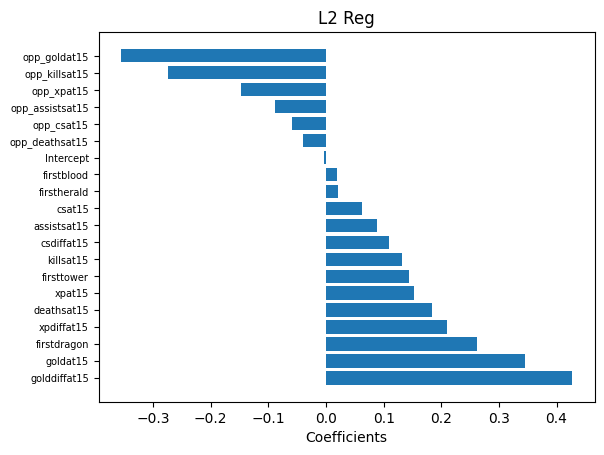

In [68]:
plt.rcdefaults()
fig, ax = plt.subplots()

name,coef = coefficientsLr(trainedLrL2)
df = pd.DataFrame(data={'variable': ['Intercept'] + name, 'coefficient': coef})
df = df.sort_values(by='coefficient')

yLable = df.iloc[:, 0].tolist()
coef = df.iloc[:, 1].tolist()
y_pos = np.arange(len(yLable))

ax.barh(y_pos, coef, align='center')

ax.set_yticks(y_pos, labels=yLable, size=7)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficients')
ax.set_title('L2 Reg')

plt.show()

# Random Forest 

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
def trainingModelRandomForest(x,y,nSamples,maxDepth,minSampleSplit,minSampleLeaf,maxFeatures):
    rf=RandomForestClassifier(n_estimators=nSamples,max_depth=maxDepth, min_samples_split=minSampleSplit, min_samples_leaf=minSampleLeaf,max_features=maxFeatures)
    rf.fit(x,y)
    return rf
    #y_pred=clf.predict(X_test)

In [55]:
trainedRf=[]
nSamples=1000
maxDepth= None
minSampleSplit=2
minSampleLeaf=1
maxFeatures=10
trainedRf.append(trainingModelRandomForest(X_train,y_train,nSamples,maxDepth,minSampleSplit,minSampleLeaf,maxFeatures))

#### Validation

In [57]:
testingLr(trainedRf[0],X_test,y_test)

---------  -------
Accuracy   0.75657
Precision  0.75797
Recall     0.75159
F1 Score   0.75477
---------  -------


### Important Feature

In [58]:
def importanceRf(model):
    name = ['firstblood', 'firstdragon', 'firstherald', 'firsttower', 'goldat15',
       'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15',
       'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15',
       'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']
    featureImp = pd.Series(model.feature_importances_,index=name).sort_values(ascending=True)
    return print(featureImp.to_markdown())

In [59]:
#Important Features
importanceRf(trainedRf[0])

|                 |          0 |
|:----------------|-----------:|
| firstherald     | 0.00648342 |
| firstblood      | 0.00690505 |
| firstdragon     | 0.0114824  |
| firsttower      | 0.0124358  |
| killsat15       | 0.0153925  |
| opp_killsat15   | 0.0153935  |
| opp_deathsat15  | 0.0154243  |
| deathsat15      | 0.0154397  |
| opp_assistsat15 | 0.0320189  |
| assistsat15     | 0.0320322  |
| opp_csat15      | 0.0505703  |
| csat15          | 0.050909   |
| csdiffat15      | 0.054256   |
| opp_xpat15      | 0.0578585  |
| xpat15          | 0.0581167  |
| opp_goldat15    | 0.0779864  |
| goldat15        | 0.0793009  |
| xpdiffat15      | 0.138932   |
| golddiffat15    | 0.269063   |


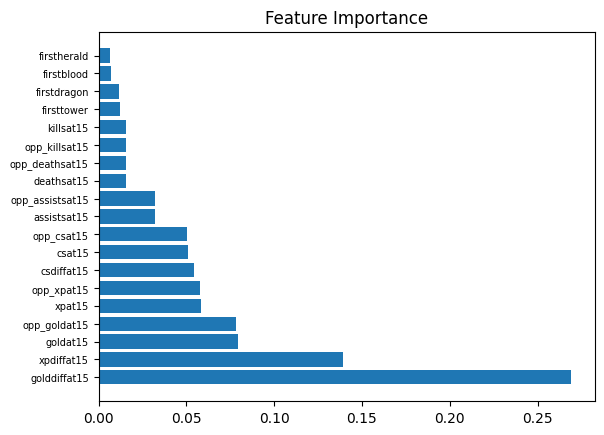

In [74]:
name = ['firstblood', 'firstdragon', 'firstherald', 'firsttower', 'goldat15',
       'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15',
       'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15',
       'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15']
featureImp = pd.Series(trainedRf[0].feature_importances_,index=name).sort_values(ascending=True)

plt.rcdefaults()
fig, ax = plt.subplots()

yLable = featureImp.index.tolist()
coef = featureImp.tolist()
y_pos = np.arange(len(yLable))
#ax.barh(y_pos, coef, xerr=error, align='center')
ax.barh(y_pos, coef, align='center')

ax.set_yticks(y_pos, labels=yLable, size=7)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('Feature Importance')

plt.show()

## Support Vector Machine

In [75]:
from sklearn.svm import SVC

#### Training the Model 

In [77]:
trainedLinearSvm=SVC(kernel='linear').fit(X_train,y_train)
trainedRbfSvm = SVC(kernel='rbf').fit(X_train,y_train)

#### Validation

In [78]:
#linear kernel
testingLr(trainedLinearSvm,X_test,y_test)

---------  -------
Accuracy   0.75954
Precision  0.76365
Recall     0.74954
F1 Score   0.75653
---------  -------


In [79]:
#rbf kernel
testingLr(trainedRbfSvm,X_test,y_test)

---------  -------
Accuracy   0.75739
Precision  0.7602
Recall     0.74974
F1 Score   0.75494
---------  -------
